## 3 -- SENTIMENT ANALYSIS

Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text.

### 3.1 -- Basic Libraries used:

Matplotlib is a cross-platform, data visualization and graphical plotting library for Python language and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB.

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


Importing some basic libraries used in sentiment analysis..

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 3.2 -- Reading csv file to perform Sentiment Analysis

In [3]:
# Using pandas .read method to read our csv file..
df_3 = pd.read_csv('02_Data_Wrangling.csv')

In [4]:
# Dropping the blank rows from 'REVIEW_CONTENT'
df_3 = df_3.dropna(subset=['REVIEW_CONTENT'])

In [5]:
df_3.head()

,SKU,PRODUCT_NAME,PRICE,PRODUCT_CATEGORY,PACK_SIZE,REVIEW_COUNT,REVIEW_DATE,REVIEW_TIME,PRICE_RATING,QUALITY_RATING,VALUE_RATING,REVIEW_CONTENT,URL,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES
6,8904417301762,Vitamin C Daily Glow Face Cream With Vitamin C...,249.00,skin,80g,1.0,2022-08-29,16:38:37,5.0,0.0,0.0,Mamaearth always wins my heart with new surpri...,https://mamaearth.in/product/vitamin-c-daily-g...,2022-08-17,2022-09-04,Rajasthan
7,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:36,5.0,0.0,0.0,"I've had acne my entire life, and this appears...",https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Madhya Pradesh
8,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:26,5.0,0.0,0.0,"Great cleanser, gentle and makes my face fresh...",https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Karnataka
9,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:15,5.0,0.0,0.0,I use Mamaearth green tea range and the result...,https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Goa
10,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:01,4.0,0.0,0.0,"I have sensitive skin, and I did not experienc...",https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Haryana


In [6]:
df_3.shape

(28228, 16)

In [7]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28228 entries, 6 to 28267
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SKU                28228 non-null  int64  
 1   PRODUCT_NAME       28228 non-null  object 
 2   PRICE              28228 non-null  object 
 3   PRODUCT_CATEGORY   28228 non-null  object 
 4   PACK_SIZE          28228 non-null  object 
 5   REVIEW_COUNT       28228 non-null  float64
 6   REVIEW_DATE        28228 non-null  object 
 7   REVIEW_TIME        28228 non-null  object 
 8   PRICE_RATING       28228 non-null  float64
 9   QUALITY_RATING     28228 non-null  float64
 10  VALUE_RATING       28228 non-null  float64
 11  REVIEW_CONTENT     28228 non-null  object 
 12  URL                28228 non-null  object 
 13  DATE_OF_CREATION   28228 non-null  object 
 14  LAST_UPDATED_DATE  28228 non-null  object 
 15  STATES             28228 non-null  object 
dtypes: float64(4), int64(1

In [8]:
df_3.REVIEW_CONTENT.head()

6     Mamaearth always wins my heart with new surpri...
7     I've had acne my entire life, and this appears...
8     Great cleanser, gentle and makes my face fresh...
9     I use Mamaearth green tea range and the result...
10    I have sensitive skin, and I did not experienc...
Name: REVIEW_CONTENT, dtype: object

### 3.3 -- Installing PyTorch

PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library. It is one of the preferred platforms for deep learning research. The framework is built to speed up the process between research prototyping and deployment.

In [9]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


### 3.4 -- Installing Transformers

PyTorch-Transformers is a library of state-of-the-art pre-trained models for NLP. Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio. It provides APIs to quickly download and use those pretrained models on a given text  and fine-tune them on your own datasets.

In [10]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


Importing Dependencies..

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

Downloading and installing pre-trained BERT model from Hugging Face Transformers

In [12]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

C:\Users\maiab\AppData\Roaming\Python\Python310\site-packages\torch\serialization.py:871: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  obj = cast(Storage, torch._UntypedStorage(nbytes))


In [13]:
df_3['REVIEW_CONTENT'].iloc[0]

'Mamaearth always wins my heart with new surprises so called new launches. I was literally searching for face cream especially after wash. I started using this mamaearth’s face cream. My face started glowing and I’m fully satisfied as it is made of natural hero ingredients which keeps our skin hydrated and moisturizing agent is really effective '

### 3.5 -- SENTIMENT score

In [14]:
# Creating an User-Defined Function in which our BERT model will read the review and give the sentiment score for that
def sentiment_score(review):
    tokens = tokenizer.encode(review,return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [15]:
sentiment_score(df_3['REVIEW_CONTENT'].iloc[0])

5

In [16]:
# Using Lambda function to loop through each reviews present in the dataframe
df_3['SENTIMENT_SCORE'] = df_3['REVIEW_CONTENT'].apply(lambda x: sentiment_score(x[:512])) # Here '512' is the limited no. of takens which can be passed in NLP pipeline at a time

In [17]:
df_3['SENTIMENT_SCORE']

6        5
7        5
8        5
9        5
10       4
        ..
28263    5
28264    5
28265    5
28266    5
28267    4
Name: SENTIMENT_SCORE, Length: 28228, dtype: int64

In [18]:
# Giving conditions to determine the Sentiment of reviews according to their Sentiment score
df_3['SENTIMENT'] = np.where(df_3['SENTIMENT_SCORE'].isin([5,4]), 'Positive',(np.where(df_3['SENTIMENT_SCORE'].isin([1,2]), 'Negative', 'Neutral')))
df_3.head(5)

,SKU,PRODUCT_NAME,PRICE,PRODUCT_CATEGORY,PACK_SIZE,REVIEW_COUNT,REVIEW_DATE,REVIEW_TIME,PRICE_RATING,QUALITY_RATING,VALUE_RATING,REVIEW_CONTENT,URL,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES,SENTIMENT_SCORE,SENTIMENT
6,8904417301762,Vitamin C Daily Glow Face Cream With Vitamin C...,249.00,skin,80g,1.0,2022-08-29,16:38:37,5.0,0.0,0.0,Mamaearth always wins my heart with new surpri...,https://mamaearth.in/product/vitamin-c-daily-g...,2022-08-17,2022-09-04,Rajasthan,5,Positive
7,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:36,5.0,0.0,0.0,"I've had acne my entire life, and this appears...",https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Madhya Pradesh,5,Positive
8,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:26,5.0,0.0,0.0,"Great cleanser, gentle and makes my face fresh...",https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Karnataka,5,Positive
9,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:15,5.0,0.0,0.0,I use Mamaearth green tea range and the result...,https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Goa,5,Positive
10,8904417300338,Green Tea Face Wash With Green Tea & Collagen ...,399.00,skin,100ml,47.0,2022-09-02,16:34:01,4.0,0.0,0.0,"I have sensitive skin, and I did not experienc...",https://mamaearth.in/product/green-tea-face-wa...,2022-08-17,2022-09-01,Haryana,4,Positive


### 3.6 -- Comparing Sentiment

In [19]:
df_3['SENTIMENT'].value_counts()

Positive    26846
Negative      810
Neutral       572
Name: SENTIMENT, dtype: int64

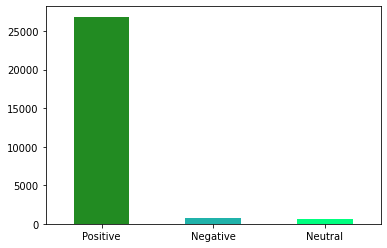

In [20]:
# Plotting the sentiments in bar-graph
Result=df_3['SENTIMENT'].value_counts()
Result.plot(kind='bar', rot=0, color=['forestgreen','lightseagreen','springgreen']);

In [21]:
groups = df_3.groupby(['PRODUCT_NAME','SENTIMENT'])['SENTIMENT'].apply(lambda x: x.count())
groups

PRODUCT_NAME                                                                                       SENTIMENT
 Aloe Vera Face Wash with Aloe Vera & Ashwagandha for a Youthful Glow - 100 ml                     Negative       1
                                                                                                   Positive      21
 Castor Oil for Healthier Skin, Hair and Nails with 100% Pure and Natural Cold-Pressed Oil, 150ml  Negative       3
                                                                                                   Neutral        1
                                                                                                   Positive     120
                                                                                                               ... 
Vitamin C Underarm Mask with Vitamin C & Turmeric for Brighter Underarms - 50 g                    Positive       9
Vitamin C Underarm Scrub with Vitamin C and Turmeric for Brighter Underarms – 5

<AxesSubplot:xlabel='PRODUCT_NAME'>

C:\Users\maiab\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


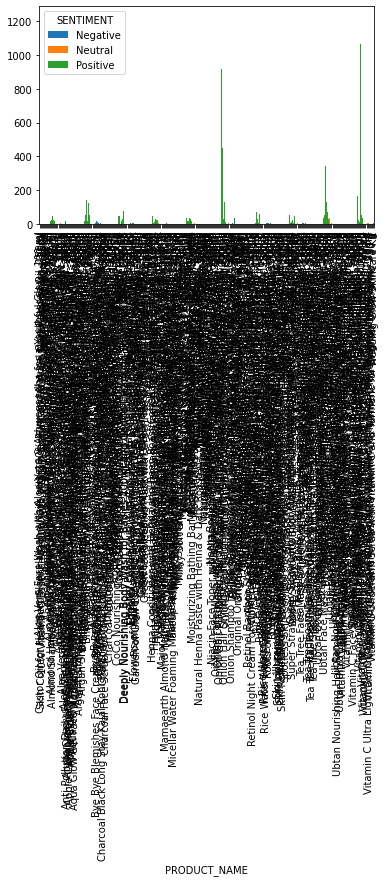

In [22]:
pd.crosstab(df_3['PRODUCT_NAME'],df_3['SENTIMENT']).plot.bar()

### 3.7 -- Text Preprocessing

Text preprocessing is an approach for cleaning and preparing text data for use in a specific context. TextBlob is a Python library for processing textual data. It provides a simple API for diving into common NLP tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [23]:
# Installing Textblob library
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


Importing Dependencies..

In [24]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

In [25]:
# Lambda function for lower casing and removing punctuations
df_3['REVIEW_PREPROCESSED_TEXT'] = df_3['REVIEW_CONTENT'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_3.REVIEW_PREPROCESSED_TEXT.head(5)

6     mamaearth always wins my heart with new surpri...
7     i've had acne my entire life, and this appears...
8     great cleanser, gentle and makes my face fresh...
9     i use mamaearth green tea range and the result...
10    i have sensitive skin, and i did not experienc...
Name: REVIEW_PREPROCESSED_TEXT, dtype: object

In [26]:
# Using regex for some text cleaning (removing unwanted symbols and characters)
df_3['REVIEW_PREPROCESSED_TEXT'] = df_3['REVIEW_PREPROCESSED_TEXT'].str.replace('[^\w\s]', "")
df_3.REVIEW_PREPROCESSED_TEXT.head(5)

C:\Users\maiab\AppData\Local\Temp\ipykernel_13804\2406067955.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_3['REVIEW_PREPROCESSED_TEXT'] = df_3['REVIEW_PREPROCESSED_TEXT'].str.replace('[^\w\s]', "")


6     mamaearth always wins my heart with new surpri...
7     ive had acne my entire life and this appears t...
8     great cleanser gentle and makes my face fresh ...
9     i use mamaearth green tea range and the result...
10    i have sensitive skin and i did not experience...
Name: REVIEW_PREPROCESSED_TEXT, dtype: object

### 3.8 -- Removing Stop Words

In [27]:
# Lambda function for removing english stop words
stop_words = stopwords.words('english')
df_3['REVIEW_PREPROCESSED_TEXT'] = df_3['REVIEW_PREPROCESSED_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_3.REVIEW_PREPROCESSED_TEXT.head()

6     mamaearth always wins heart new surprises call...
7     ive acne entire life appears face wash doesnt ...
8     great cleanser gentle makes face fresh clean u...
9     use mamaearth green tea range results shocked ...
10    sensitive skin experience breakouts using prod...
Name: REVIEW_PREPROCESSED_TEXT, dtype: object

### 3.9 -- Spelling Correction

In [28]:
# Spelling correction consumes large amount of time, that's why I've commented this out

# df_3['REVIEW_PREPROCESSED_TEXT'] = df_3['REVIEW_PREPROCESSED_TEXT'].apply(lambda x: str(TextBlob(x).correct()))
# df_3.REVIEW_PREPROCESSED_TEXT.head()

### 3.10 -- Lemmatization

Lemmatization is one of the most common text pre-processing techniques used in NLP and machine learning in general. In lemmatization, we try to reduce a given word to its root word. The root word is called a lemma in the lemmatization process.

In [29]:
# Lambda function for lemmatizing each review
df_3['REVIEW_PREPROCESSED_TEXT'] = df_3['REVIEW_PREPROCESSED_TEXT'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_3.REVIEW_PREPROCESSED_TEXT.head()

6     mamaearth always win heart new surprise called...
7     ive acne entire life appears face wash doesnt ...
8     great cleanser gentle make face fresh clean us...
9     use mamaearth green tea range result shocked p...
10    sensitive skin experience breakout using produ...
Name: REVIEW_PREPROCESSED_TEXT, dtype: object

In [30]:
# In case you want separate data file
df_3.to_csv('03_Sentiment_Analysis.csv',index=False)

### 3.11 -- Using WORD_CLOUD for REVIEW_PRE-PROCESSED_TEXT

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In [31]:
# Installing word cloud
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


Importing Dependencies..

In [32]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [33]:
df_3.columns

Index(['SKU', 'PRODUCT_NAME', 'PRICE', 'PRODUCT_CATEGORY', 'PACK_SIZE',
       'REVIEW_COUNT', 'REVIEW_DATE', 'REVIEW_TIME', 'PRICE_RATING',
       'QUALITY_RATING', 'VALUE_RATING', 'REVIEW_CONTENT', 'URL',
       'DATE_OF_CREATION', 'LAST_UPDATED_DATE', 'STATES', 'SENTIMENT_SCORE',
       'SENTIMENT', 'REVIEW_PREPROCESSED_TEXT'],
      dtype='object')

In [34]:
df_3.SENTIMENT_SCORE.value_counts()

5    20999
4     5847
3      572
2      423
1      387
Name: SENTIMENT_SCORE, dtype: int64

### 3.12 -- Installing Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [35]:
!pip install Seaborn

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='SENTIMENT_SCORE', ylabel='count'>

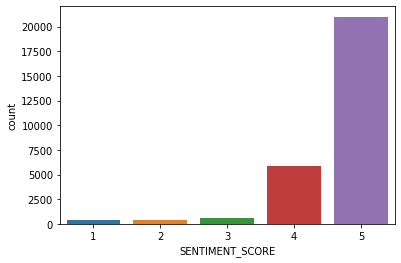

In [37]:
# Plotting sentiment scores in graph
sns.countplot(data = df_3, x = 'SENTIMENT_SCORE')

In [38]:
# Creating a copy data frame of "df" to perform exploratory data analysis upon that
df_4 = df_3

# Dropping null values
df_4.dropna(inplace=True)

In [39]:
# Creating 5 different objects to store these sentiment scores
SENTIMENT_SCORE_1 = df_4[df_4['SENTIMENT_SCORE'] == 1]
SENTIMENT_SCORE_2 = df_4[df_4['SENTIMENT_SCORE'] == 2]
SENTIMENT_SCORE_3 = df_4[df_4['SENTIMENT_SCORE'] == 3]
SENTIMENT_SCORE_4 = df_4[df_4['SENTIMENT_SCORE'] == 4]
SENTIMENT_SCORE_5 = df_4[df_4['SENTIMENT_SCORE'] == 5]

In [40]:
# Concatenating all the 'SENTIMENT_SCOREs'
df_4_sample = pd.concat([SENTIMENT_SCORE_1,SENTIMENT_SCORE_2,SENTIMENT_SCORE_3,SENTIMENT_SCORE_4,SENTIMENT_SCORE_5],axis=0)
df_4_sample.reset_index(drop=True,inplace=True)

### 3.13 -- Creating a WordCloud

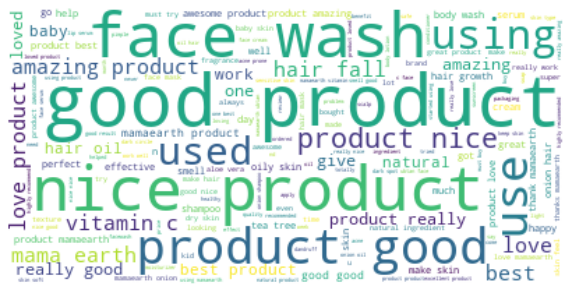

In [41]:
# Wordcloud function's input needs to be a single string of text...
# Concatenating all 'REVIEW_CONTENT' into a single string...
Reviews_string = df_4_sample.REVIEW_PREPROCESSED_TEXT.str.cat(sep=' ')
Wordcloud = WordCloud(background_color='white').generate(Reviews_string)

# Plot
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
# Spliting the data into Negative (PRICE_RATING is 1 or 2) and Positive (PRICE_RATING is 4 or 5) review.
NEGATIVE_REVIEW_TEXT = df_4_sample[df_4_sample['SENTIMENT_SCORE'].isin([1,2])]
POSITIVE_REVIEW_TEXT = df_4_sample[df_4_sample['SENTIMENT_SCORE'].isin([4,5])]

# Concatinating to single string
NEGATIVE_REVIEW_TEXT_str = NEGATIVE_REVIEW_TEXT.REVIEW_PREPROCESSED_TEXT.str.cat()
POSITIVE_REVIEW_TEXT_str = POSITIVE_REVIEW_TEXT.REVIEW_PREPROCESSED_TEXT.str.cat()

### 3.14 -- Negative WordCloud

Text(0.5, 1.0, 'Keywords in Negative Scores')

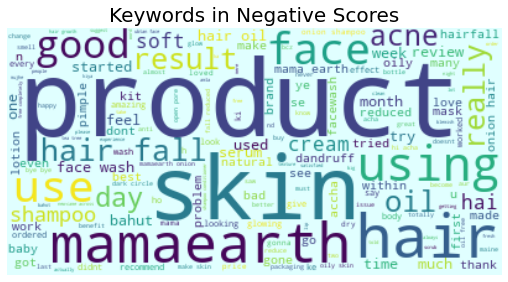

In [43]:
# WordCloud for Negative reviews..
Wordcloud_negative = WordCloud(background_color='lightcyan').generate(NEGATIVE_REVIEW_TEXT_str)

# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(Wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Keywords in Negative Scores',fontsize=20)
# plt.show()

### 3.15 -- Positive WordCloud

Text(0.5, 1.0, 'Keywords in Positive Scores')

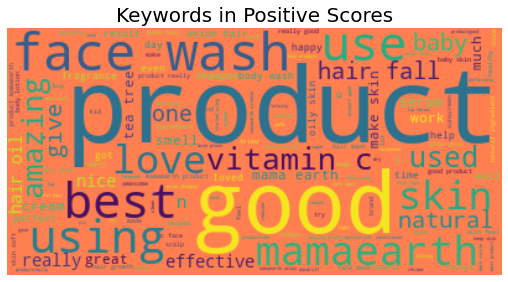

In [44]:
# WordCloud for Positive reviews..
Wordcloud_positive = WordCloud(background_color='coral').generate(POSITIVE_REVIEW_TEXT_str)

# Plot
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(Wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Keywords in Positive Scores',fontsize=20)
# plt.show()

So, these are the codes for Sentiment Analysis which we have performed in the previous data. We now have the sentiment scores and sentiments of the reviews.